**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Emily Cai
- Jae Kim
- Peter Shamoun
- Viki Shi

# Research Question

-  How well does the UC San Diego computer science curriculum prepare students skill-wise for industry needs in comparison to the other UCs based on the skills reported by developers in industry surveys in the past 5 years?




## Background and Prior Work


## Introduction

Computer science programs are designed to prepare students for successful careers in technology. However, industry technologies and required skills evolve rapidly—often outpacing curriculum updates—resulting in graduates who may lack the hands-on, current technical competencies demanded by employers. With a challenging tech job market and increasingly scarce new-graduate roles, concerns have grown that undergraduate programs, including the UC San Diego computer science program and the broader University of California curriculum, are not adequately preparing students for today's industry needs.

This study evaluates the alignment between the UCSD and overall UC computer science curricula and the skills required in the tech industry. The analysis focuses on:
- **Curriculum Content:** Reviewing course descriptions and curriculum goals.
- **Industry Data:** Analyzing insights from recent Stack Overflow developer surveys and comparing them with current job market requirements.

**Research Objectives and Measurement:**
- **Intended Relationship:** The study seeks to determine the correlation between the curriculum’s technical content and the skills demanded by the tech industry. In particular, it examines whether courses covering emerging technologies like cloud computing, DevOps, containerization with Kubernetes and Docker adequately match the expertise employers seek.
- **Measurement Metrics:** 
  - Quantifying the percentage of courses at UCSD and other UC campuses that include training in in-demand technologies.
  - Comparing the success rate of UCSD graduates in securing tech roles with that of their peers from other UC institutions.
  - Evaluating the representation of practical skills in the curriculum against their frequency in industry job postings.
  - Using survey data to assess graduates’ proficiency in applied skills versus the theoretical emphasis in academic programs.

Prior studies have underscored significant gaps between academic preparation and industry requirements. For example:
- **[Closing the Gap between Software Engineering Education and Industrial Needs (Garousi et al., 2018)](https://arxiv.org/pdf/1812.01954)**  
  This review of 33 studies from 12 countries found that graduates often lack hands-on skills in cloud computing, DevOps, and modern software development practices. It concluded that while universities emphasize theoretical knowledge, employers prioritize applied and soft skills, such as teamwork and communication.
- **[The Gap between Higher Education and the Software Industry – A Case Study on Technology Differences (Dobslaw et al., 2023)](https://arxiv.org/pdf/2303.15597)**  
  This study highlighted a growing disparity between the academic courses that aspiring software engineers take and the practical work they perform on the job. It emphasized the lack of courses on cloud computing and related technologies, suggesting that universities update their curricula more frequently to remain relevant to industry demands.


# Hypothesis


UCSD is ranked third by US News and World Report among UC schools for computer science, so we expect that its curriculum is comparable, if not stronger than other UCs. We predict that UCSD's computer science curriculum prepares students as well as other UCs for industry needs, given its strong ranking. If significant gaps exist, they may be systemic across UC programs rather than specific to UCSD. However, if UCSD shows stronger alignment with industry standards, this may indicate that higher-ranked CS programs provide better preparation from academia to the workforce

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Stack Overflow Developer Surveys
  - Link to the dataset:https://survey.stackoverflow.co/
  - Number of observations: 65,000-80,000 each 
  - Number of variables: 116

We intend to use the the survey results from the past 4 years, from 2021-2024. For our research, the important variables on skills learned will include LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, ToolsTechHaveWorkedWith,MiscTechHaveWorkedWith, EmbeddedHaveWorkedWith and ProfessionalTech, which are all categorical, multi-select string data. Additionally, we want to understand respondents' skillsets in relation to their education level and where they learned these relevant skills, so we will also consider the variables EdLevel (single choice string), DevType (single choice string), Country(single choice string). 

Note that the csvs were extremely long and contained thousands of obervations, especially across 4 years. Therefore, we had to split each csv into two parts to fit into our github repo, and our dataset #1 is a merged dataframe on the above specified columns. 

- Dataset #2-10
  - Dataset Name:UC CS Courses
  - Number of observations: 49-100 each
  - Number of variables: 5

We webscraped every CS class from the 9 undergrad UCs, collecting course IDs, titles, and descriptions (strings), whether they were upper or lower div (boolean), and used a python package to extract keywords(list of strings) 

We plan to merge the UC CS Courses together into one dataframe, as we split up the webscraping and collection amongst members

## Stack Overflow Data

In [18]:
import pandas as pd 
pd.set_option('display.max_columns', None)

#2021 survey 
stack_2021_a = pd.read_csv("stack_overflow_survey_2021_1.csv")
stack_2021_b = pd.read_csv("stack_overflow_survey_2021_2.csv")

stack_2021 = pd.concat([stack_2021_a, stack_2021_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2021 = stack_2021[cols]

#2023 survey 
stack_2023_a = pd.read_csv("stack_overflow_survey_2023_1.csv")
stack_2023_b = pd.read_csv("stack_overflow_survey_2023_2.csv")

stack_2023 = pd.concat([stack_2023_a, stack_2023_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2023 = stack_2023[cols]

#2024 survey 
stack_2024_a = pd.read_csv("stack_overflow_survey_2024_1.csv")
stack_2024_b = pd.read_csv("stack_overflow_survey_2024_2.csv")

stack_2024 = pd.concat([stack_2024_a, stack_2024_b], ignore_index=True)

cols = ["Country", "EdLevel", "DevType", "LanguageHaveWorkedWith", 
        "DatabaseHaveWorkedWith", "PlatformHaveWorkedWith", "WebframeHaveWorkedWith", 
        "ToolsTechHaveWorkedWith", "MiscTechHaveWorkedWith"]

stack_2024 = stack_2024[cols]
stack_df = pd.concat([stack_2021, stack_2023, stack_2024], ignore_index=True) 
stack_df.to_csv("complete_concat_stack_df.csv")

## Dataset #2 (if you have more than one, use name instead of number here)

In [2]:
#UC Berkeley
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
from keybert import KeyBERT

tqdm.pandas()

berk = "https://guide.berkeley.edu/courses/compsci/"
berk_req = requests.get(berk)
soup = BeautifulSoup(berk_req.text, "html.parser")

divs = soup.find_all("div", class_="courseblock")


class_id = []
class_title = []
desc = []
upper = []

for div in divs:
    heading = div.find("p", class_="course-heading")

    if heading:
        course_code = div.find("span", class_="code")
        course_title = div.find("span", class_="title")
        course_desc = div.find(class_="courseblockdesc")

        course_details = div.find_all("p")
        is_undergrad = any("Undergraduate" in p.text for p in course_details)

        if is_undergrad:  
            course_id_text = course_code.text.strip()
            class_id.append(course_id_text)
            class_title.append(course_title.text.strip())
            desc.append(course_desc.text.split('\n')[1])

           
            course_number = int("".join(filter(str.isdigit, course_id_text)))  # Extract numeric part
            is_upper = course_number >= 100
            upper.append(is_upper)  


df = pd.DataFrame({
    "Course ID": class_id,
    "Course Title": class_title,
    "Course Description": desc,
    "Upper Div": upper  
})


def keyword_wrapper(doc):
    kw_model = KeyBERT()
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"]  # Stop words
    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)]  # Extract top 10 keywords


df['keywords'] = df['Course Description'].progress_apply(keyword_wrapper)

  0%|          | 0/48 [00:00<?, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\16196\miniforge3\envs\dsc80\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\16196\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

 35%|███▌      | 17/48 [00:27<00:50,  1.63s/it]


KeyboardInterrupt: 

In [ ]:
#UC Merced

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import time
from tqdm import tqdm

from bs4 import BeautifulSoup
import requests
import re

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager


from keybert import KeyBERT

UCM_home_url = "https://catalog.ucmerced.edu/content.php?filter%5B27%5D=CSE&filter%5B29%5D=&filter%5Bkeyword%5D=&filter%5B32%5D=1&filter%5Bcpage%5D=1&cur_cat_oid=23&expand=&navoid=2517&search_database=Filter#acalog_template_course_filter"

response = requests.get(UCM_home_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    links = [soup.find_all("td", class_="width")[i].find_all('a')[0] for i in range(len(soup.find_all("td", class_="width")))]
    coids = [links[i]['href'][-5:] for i in range(len(links))]
    full_links = [f'https://catalog.ucmerced.edu/preview_course_nopop.php?catoid=23&coid={course}' for course in coids]
else:
    print('Request failed:', response.status_code)

data = []
for url in full_links:
    resposne = requests.get(url)
    if response.status_code == 200:

        driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

        driver.get(url)

        time.sleep(1)

        rendered_html = driver.page_source
        
        driver.quit()

        soup = BeautifulSoup(rendered_html, "html.parser")

        soup = soup.find('td', class_ = 'block_content')

        header = soup.find("h1", id="course_preview_title")

        header_text = header.get_text(strip=True)
        course_code, course_title = [part.strip() for part in header_text.split(":", 1)]

        course_description = ""
        for br in soup.find_all("br"):
            next_text = br.next_sibling
            if next_text and isinstance(next_text, str):
                cleaned = next_text.strip()
                if cleaned and "Unit" not in cleaned:
                    course_description = cleaned
                    break

        result = [course_code, course_title, course_description]
        data.append(result)

    
    else:
        print('Request failed:', response.status_code)

df = pd.DataFrame(columns = ['Course ID', 'Course Title', 'Description'], data=data)

df['Upper Div'] = df['Course ID'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
    "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors",
    "approach", "aspects", "awarded",
    "concepts", "course", "courses", "credit", "design", "fields",
    "foundation", "fundamental", "fundamentals", "introduction", "issues", "level",
    "lower", "major", "methods", "none", "overview", "perspectives",
    "practice", "practices", "principles", "process", "processes",
    "programs", "related", "required", "requirement", "role",
    "skills", "study", "techniques", "tools", "topics", "understanding",
    "upper", "various", "work"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
df.head()
end = time.time()
print('Time:', end - start) #print time

df= df[['Course ID',	'Course Title',	'Upper Div',	'keywords']]
df.columns = ['Course ID', 'Course Title', 'Upper', 'Skills']

In [ ]:
#UCD 
ucd_url = "https://catalog.ucdavis.edu/courses-subject-code/ecs/"
req = requests.get(ucd_url)
soup = BeautifulSoup(req.text)

divs = soup.find_all("div", class_="courseblock")

class_id = []
class_title = []
desc = []


for div in divs:
    code_element = div.find("span", class_="text courseblockdetail detail-code margin--span text--semibold text--big")
    title_element = div.find("span", class_="text courseblockdetail detail-title margin--span text--semibold text--big")
    desc_element = div.find("p", class_= "courseblockextra noindent")

    class_id.append(code_element.text.strip())
    class_title.append(title_element.text.strip().replace('—', ""))
    desc.append(desc_element.text.split("Course Description:")[1])

df = pd.DataFrame({"Course ID": class_id, "Course Title": class_title, "Course Description":desc})

df["Upper Div"] = df["Course ID"].str.extract(r'(\d+)')[0].astype(int).apply(lambda x:x>=100)
df = df[df["Course ID"].str.extract(r'(\d+)')[0].astype(int) < 200]

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Course Description'].progress_apply(keyword_wrapper) #apply functon

In [ ]:
#UC Irvine 
uci_url = 'https://catalogue.uci.edu/allcourses/compsci/'
req = requests.get(uci_url)
soup = BeautifulSoup(req.text)
divs = soup.find_all("div", class_="courseblock")

class_id = []
class_title = []
desc = []
upper = []

for div in divs:
    # Extract Course ID and Title
    title_element = div.find("p", class_="courseblocktitle")
    if title_element:
        full_title = title_element.get_text(strip=True)
        course_code, course_name = full_title.split('.', 1)
        course_number = int("".join(filter(str.isdigit, course_code)))
        if course_number < 200:
            class_id.append(course_code.strip())
            class_title.append(course_name.split('.')[0].strip())

            desc_element = div.find("div", class_="courseblockdesc")
            desc_text = []
            if desc_element:
                for p in desc_element.find_all("p"):
                    desc_text.append(p.get_text(strip=True))
            desc.append(" ".join(desc_text))
            if course_number >= 100:
                upper.append(True)
            else:
                upper.append(False)

df = pd.DataFrame({
    "Course ID": class_id,
    "Course Title": class_title,
    "Upper": upper,
    "Skills": desc
})

def clean_description(text):
    text = text.split("Prerequisite:")[0]
    text = text.split("Restriction:")[0]
    return text.strip()

df['Skills']= df['Skills'].apply(clean_description)

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors", "students"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['Skills'] = df['Skills'].apply(keyword_wrapper) #apply functon
df

In [ ]:
#UC Riverside
UCR_url = "https://www1.cs.ucr.edu/undergraduate/course-descriptions"

response = requests.get(UCR_url)

if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, "html.parser")

    tables = soup.find_all("table", class_="ui yellow definition striped table")

    header = tables[0].find_all('tr')[0].text.split('\n')[1:4]

    data = [tables[0].find_all('tr')[i].text.split('\n')[1:4] for i in range(1, len(tables[0].find_all('tr')))]

    df = pd.DataFrame(data, columns = header)

    
    display(df.head())

else:
    print('response failed:', response.status_code)

    df = df[df['Course'].str[:2]==('CS')].reset_index().drop(columns = ['index']) #remove non-cs courses

df['Upper Div'] = df['Course'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class


def remove_prereq(doc):
    doc = re.sub(r'^.*?Prerequisite\(s\):.*?(\.|\n)', '', doc, flags=re.DOTALL).strip() #remove prerequisites
    
    #for first class
    doc = re.sub(r'4 Units, Lecture, 3 hours; laboratory,2 hours; individual study, 1 hour\.', '', doc).strip()
    
    return doc



df['Description'] = df['Description'].apply(remove_prereq)

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
                  "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
df.head()
end = time.time()
print('Time:', end - start) #print time

df = df.drop(columns = ['Description'])
df.columns = ['Course ID', 'Course Title', 'Upper', 'Skills']
df

In [ ]:
#UCSD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import time
from tqdm import tqdm

from bs4 import BeautifulSoup
import requests
import re


from keybert import KeyBERT
UCR_url = "https://catalog.ucsd.edu/courses/CSE.html"

response = requests.get(UCR_url)

if response.status_code == 200:
    
    soup = BeautifulSoup(response.text, "html.parser")

    div = soup.find('div', class_ = "col-md-12 blank-slate")

    courses = [i.text.strip().split('.') for i in div.find_all('p', class_ = 'course-name')]
    courses = [course for course in courses if int(re.search(r'\d+', course[0]).group()) < 200]

    for course in courses:
        course[1] = re.sub(r'\s*\(\d+.*$', '', course[1])
    
    descriptions = [i.text for i in div.find_all('p', class_ = 'course-descriptions')]

    filtered_descriptions = [
    description.split('Prerequisites')[0]
    for name, description in zip(courses, descriptions)
    if int(re.search(r'\d+', name[0]).group()) < 200
]

    data = [courses[i] +  [filtered_descriptions[i]] for i in range(len(courses))]

    
    df = pd.DataFrame(columns = ['Course ID', 'Course Title', 'Description'], data=data)
    display(df)

else:
    print('response failed:', response.status_code)

df['Upper Div'] = df['Course ID'].str.extract(r'(\d+)')[0].astype(int).apply(lambda x: x >= 100) #Upper div class is 100-199 class
df.head()

start = time.time() #time it
tqdm.pandas() #time it

def keyword_wrapper(doc):
    kw_model = KeyBERT() #instantiate model
    
    stop_words = ["cs", "prerequisite", "grade", "requirement", 
    "courses", "instructor", "faculty", "computer", "student", "concurrently", "majors",
    "approach", "aspects", "awarded",
    "concepts", "course", "courses", "credit", "design", "fields",
    "foundation", "fundamental", "fundamentals", "introduction", "issues", "level",
    "lower", "major", "methods", "none", "overview", "perspectives",
    "practice", "practices", "principles", "process", "processes",
    "programs", "related", "required", "requirement", "role",
    "skills", "study", "techniques", "tools", "topics", "understanding",
    "upper", "various", "work"] #dont consider these words

    return [i[0] for i in kw_model.extract_keywords(doc, stop_words=stop_words, top_n=10)] #top 10 keywords

df['keywords'] = df['Description'].progress_apply(keyword_wrapper) #apply functon
df.head()
end = time.time()
print('Time:', end - start) #print time

df = df.drop(columns=['Description'])
df['Skills'] = df['keywords']
df = df.drop(columns=['keywords'])

## Final Cleaned UCs DF

In [ ]:
berkeley = pd.read_csv("UC_Berkeley.csv")
berkeley["University"] = "Berkeley"
berkeley = berkeley[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

merced = pd.read_csv("UC_Merced.csv")
merced["University"] = "Merced"
merced["Upper Div"] = merced['Upper']
merced = merced[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

davis = pd.read_csv("UCD.csv")
davis["Skills"] = davis['keywords']
davis["University"] = "Davis"
davis = davis[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

irvine = pd.read_csv("UCI.csv")
irvine["University"] = "Irvine"
irvine["Upper Div"] = irvine['Upper']
irvine = irvine[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

la = pd.read_csv("UCLA.csv")
la['University'] = 'LA'
la = la[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

riverside = pd.read_csv("UCR.csv")
riverside["University"] = "Riverside"
riverside["Upper Div"] = riverside['Upper']
riverside = riverside[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sd = pd.read_csv("UCSD.csv")
sd['University'] = 'SD'
sd = sd[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sc = pd.read_csv("UCSC.csv")
sc["University"] = "SC"
sc["Upper Div"] = sc['Upper']
sc = sc[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]


sb = pd.read_csv("UCSB.csv")
sb['University'] = 'SB'
sb = sb[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

uc_df = pd.concat([berkeley, merced, davis, irvine, la, riverside, sd, sc, sb], ignore_index=True)
uc_df.to_csv("ucs_concat_df.csv")


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [3]:
berkeley = pd.read_csv("UC_Berkeley.csv")
berkeley["University"] = "Berkeley"
berkeley = berkeley[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

merced = pd.read_csv("UC_Merced.csv")
merced["University"] = "Merced"
merced["Upper Div"] = merced['Upper']
merced = merced[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

davis = pd.read_csv("UCD.csv")
davis["Skills"] = davis['keywords']
davis["University"] = "Davis"
davis = davis[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

irvine = pd.read_csv("UCI.csv")
irvine["University"] = "Irvine"
irvine["Upper Div"] = irvine['Upper']
irvine = irvine[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

la = pd.read_csv("UCLA.csv")
la['University'] = 'LA'
la = la[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

riverside = pd.read_csv("UCR.csv")
riverside["University"] = "Riverside"
riverside["Upper Div"] = riverside['Upper']
riverside = riverside[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sd = pd.read_csv("UCSD.csv")
sd['University'] = 'SD'
sd = sd[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]

sc = pd.read_csv("UCSC.csv")
sc["University"] = "SC"
sc["Upper Div"] = sc['Upper']
sc = sc[['University', 'Course ID', 'Course Title', 'Upper Div', 'Skills']]


sb = pd.read_csv("UCSB.csv")
sb['University'] = 'SB'
sb = sb[['University', 'Course ID', 'Course Title',  'Upper Div', 'Skills']]

uc_df = pd.concat([berkeley, merced, davis, irvine, la, riverside, sd, sc, sb], ignore_index=True)

In [6]:
import ast

def stack_col(col_name):
    stack_col = stack_df[col_name].str.split(';').explode().unique().tolist()
    stack_col = [str(entry).lower() for entry in stack_col if pd.notna(entry)]
    return stack_col

def average_word_occurrences(word, text_list):
    text_list = [str(text).lower() for text in text_list]
    return text_list.count(word)

def check_skills(df, col_name):
    university = df.name
    skills = df['Skills'].dropna().apply(ast.literal_eval)
    skills_list = skills.explode().tolist()

    col_values = stack_col(col_name)  
    counts = [average_word_occurrences(skill, skills_list) for skill in col_values]

    return pd.Series(counts, index=col_values)  

In [7]:
lang_eda = uc_df.groupby('University').apply(check_skills, 'LanguageHaveWorkedWith')
lang_eda.to_csv("lane_eda.csv", index = False)

database_eda = uc_df.groupby('University').apply(check_skills, 'DatabaseHaveWorkedWith') 
database_eda.to_csv("database_eda.csv", index = False)

platform_eda = uc_df.groupby('University').apply(check_skills, 'PlatformHaveWorkedWith')
platform_eda.to_csv("platform_eda.csv", index = False)

webframe_eda = uc_df.groupby('University').apply(check_skills, 'WebframeHaveWorkedWith')
webframe_eda.to_csv("webframe_eda.csv", index = False)

tech_eda = uc_df.groupby('University').apply(check_skills, 'ToolsTechHaveWorkedWith')
tech_eda.to_csv("tech_eda.csv", index = False)

misctech_eda = uc_df.groupby('University').apply(check_skills, 'MiscTechHaveWorkedWith')
misctech_eda.to_csv("misctech_eda.csv", index = False)

C:\Users\16196\AppData\Local\Temp\ipykernel_3640\3688053531.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lang_eda = uc_df.groupby('University').apply(check_skills, 'LanguageHaveWorkedWith')
C:\Users\16196\AppData\Local\Temp\ipykernel_3640\3688053531.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  database_eda = uc_df.groupby('University').apply(check_skills, 'DatabaseHaveWorkedWith')
C:\Users\161

In [8]:
eda_final = pd.concat([lang_eda, database_eda, platform_eda, webframe_eda, tech_eda, misctech_eda], axis=1)
eda_final.to_csv("complete_eda.csv", index = False)

eda_final

,c++,html/css,javascript,objective-c,php,swift,python,assembly,c,r,rust,typescript,bash/shell,sql,c#,java,node.js,powershell,ruby,perl,matlab,kotlin,julia,haskell,delphi,go,scala,dart,vba,groovy,clojure,apl,lisp,f#,elixir,erlang,crystal,cobol,bash/shell (all shells),ada,lisp,ocaml,raku,zig,solidity,lua,matlab,visual basic (.net),gdscript,cobol,fortran,prolog,apex,sas,nim,flow,micropython,zephyr,postgresql,sqlite,elasticsearch,redis,mysql,microsoft sql server,oracle,mongodb,mariadb,dynamodb,couchbase,firebase,cassandra,ibm db2,supabase,bigquery,cloud firestore,dynamodb,cosmos db,h2,datomic,influxdb,firebase realtime database,microsoft access,firebird,solr,cockroachdb,snowflake,couch db,ravendb,neo4j,clickhouse,duckdb,tidb,presto,databricks sql,eventstoredb,heroku,microsoft azure,aws,google cloud platform,digitalocean,oracle cloud infrastructure,ibm cloud or watson,amazon web services (aws),netlify,vercel,google cloud,openstack,vmware,vultr,cloudflare,firebase,digital ocean,fly.io,render,hetzner,openshift,ovh,managed hosting,oracle cloud infrastructure (oci),"linode, now akamai",colocation,scaleway,ibm cloud or watson,databricks,pythonanywhere,supabase,alibaba cloud,laravel,symfony,angular,flask,vue.js,jquery,express,react.js,angular.js,ruby on rails,django,fastapi,asp.net core,spring,svelte,asp.net,gatsby,drupal,next.js,react,remix,node.js,wordpress,nestjs,angularjs,phoenix,solid.js,asp.net core,elm,nuxt.js,fastify,spring boot,deno,blazor,codeigniter,qwik,play framework,lit,htmx,strapi,yii 2,astro,docker,git,yarn,kubernetes,unity 3d,terraform,flow,unreal engine,ansible,deno,puppet,xamarin,chef,pulumi,npm,pip,vite,webpack,cargo,make,nix,homebrew,pnpm,bun,chocolatey,maven (build tool),msbuild,nuget,visual studio solution,gradle,cmake,gnu gcc,ant,wasmer,boost.test,podman,apt,llvm's clang,composer,bandit,doctest,msvc,dagger,cppunit,google test,pacman,godot,ninja,meson,qmake,catch2,build2,scons,tunit,elfspy,lest,cute,snitch,liblittletest,cordova,numpy,pandas,tensorflow,torch/pytorch,apache spark,hadoop,keras,.net core / .net 5,qt,flutter,.net framework,react native,electron,tauri,rabbitmq,spring framework,scikit-learn,.net (5+),.net framework (1.0 - 4.8),apache kafka,gtk,hugging face transformers,capacitor,mfc,opengl,xamarin,cuda,jax,opencv,ionic,.net maui,swiftui,quarkus,micronaut,ktor,tidyverse,uno platform,ruff,roslyn,directx,opencl,mlflow
University,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berkeley,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Davis,0,0,0,0,0,0,4,1,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irvine,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [9]:
corr_sum = pd.DataFrame()
corr_sum["correlation sums"] = eda_final.sum(axis=1)
corr_sum

,correlation sums
University,
Berkeley,3
Davis,10
Irvine,5
LA,3
Merced,7
Riverside,1
SB,9
SC,2
SD,14


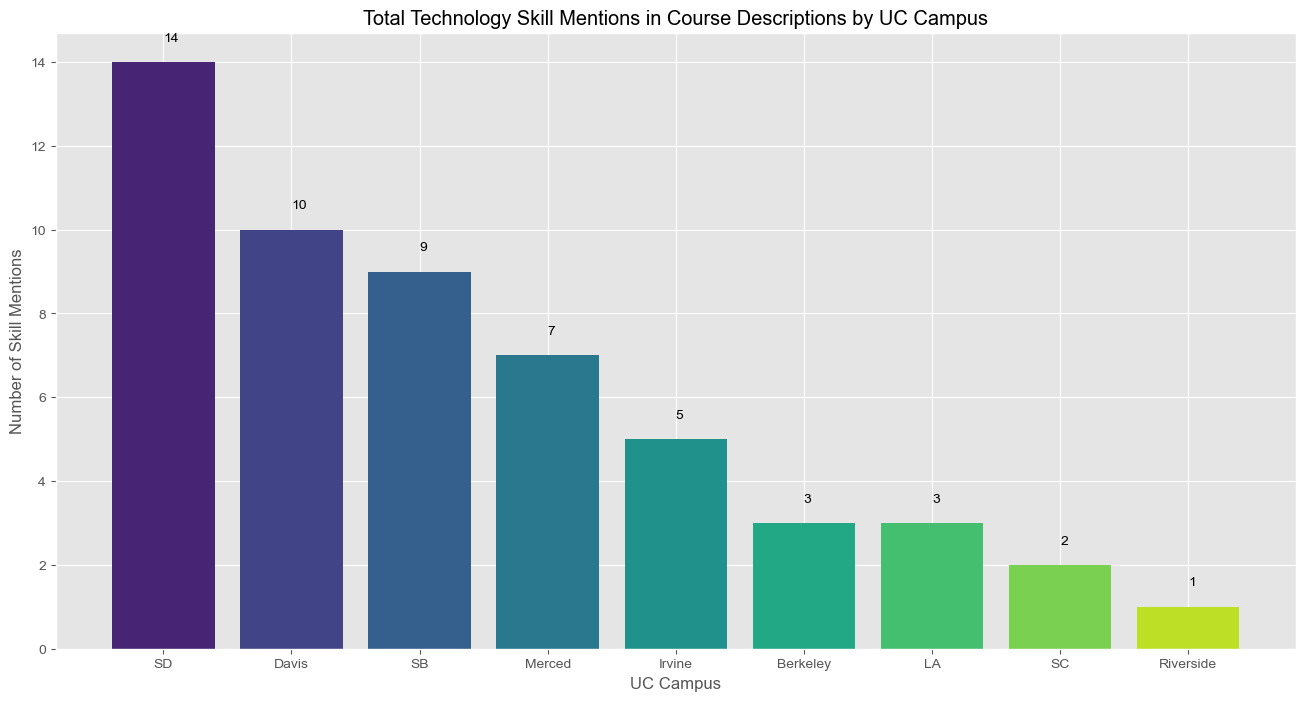

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(16, 8))

corr_sum = corr_sum.sort_values(by='correlation sums', ascending=False)


bars = plt.bar(corr_sum.index, corr_sum['correlation sums'], color=sns.color_palette("viridis", len(corr_sum)))


plt.title('Total Technology Skill Mentions in Course Descriptions by UC Campus')
plt.ylabel('Number of Skill Mentions')
plt.xlabel('UC Campus')


for i, j in enumerate(corr_sum['correlation sums']):
    plt.text(i, j + 0.5, str(j))

    
plt.show()

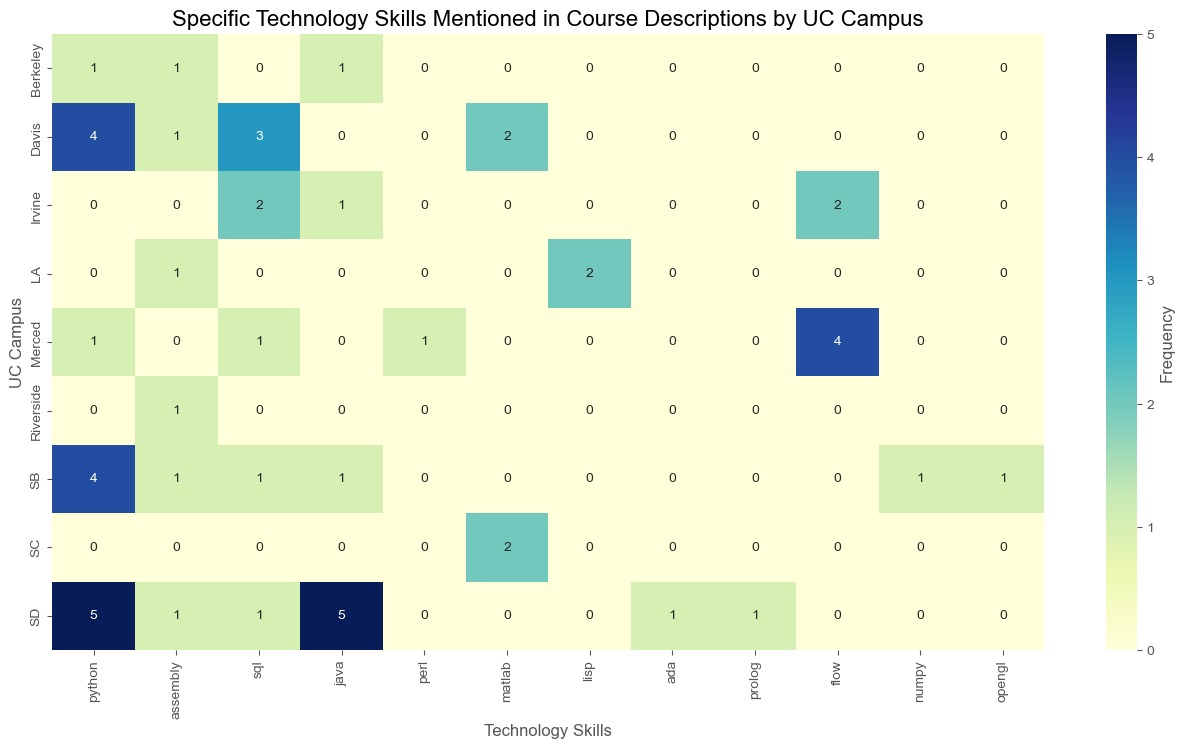

In [70]:
plt.figure(figsize=(16, 8))

non_zero_cols = eda_final.columns[(eda_final.sum() > 0)]

skills_heatmap = eda_final[non_zero_cols]

skills_heatmap = skills_heatmap.loc[:, ~skills_heatmap.columns.duplicated()]

sns.heatmap(skills_heatmap, annot=True, cmap="YlGnBu", cbar_kws={"label": "Frequency"})
plt.title('Specific Technology Skills Mentioned in Course Descriptions by UC Campus', fontsize=16)
plt.ylabel('UC Campus')
plt.xlabel('Technology Skills')
plt.xticks(rotation=90)


plt.show()

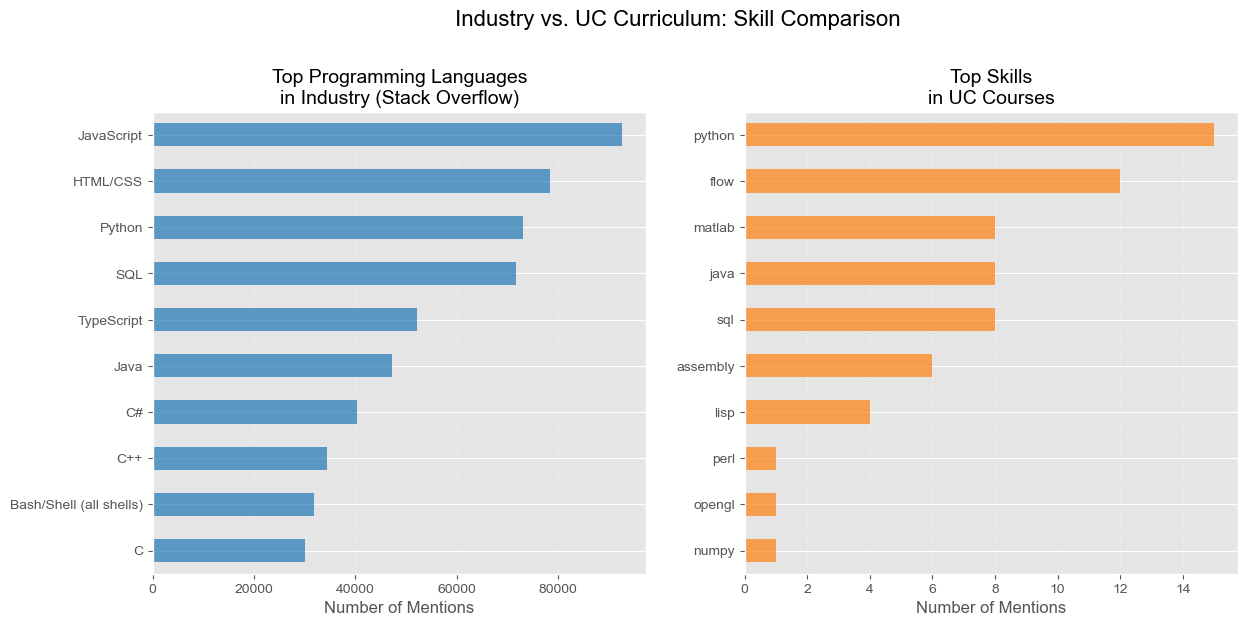

In [ ]:

def count_skills(column_name):
    all_skills = stack_df[column_name].dropna().str.split(';').explode()
    return all_skills.value_counts().head(10)

so_languages = count_skills('LanguageHaveWorkedWith')


uc_skills_sum = eda_final.sum()
lowercase_index = pd.Series(uc_skills_sum.values, index=uc_skills_sum.index.str.lower())

uc_skills_deduped = lowercase_index.groupby(level=0).sum()

top_uc_skills = uc_skills_deduped.sort_values(ascending=False).head(10)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

so_languages.plot(kind='barh', ax=ax1, color='#1f77b4', alpha=0.7)
ax1.set_title('Top Programming Languages\nin Industry (Stack Overflow)', fontsize=14)
ax1.set_xlabel('Number of Mentions', fontsize=12)
ax1.set_ylabel('')
ax1.invert_yaxis()  


top_uc_skills_sorted = top_uc_skills.sort_values(ascending=True)
top_uc_skills_sorted.plot(kind='barh', ax=ax2, color='#ff7f0e', alpha=0.7)
ax2.set_title('Top Skills\nin UC Courses', fontsize=14)
ax2.set_xlabel('Number of Mentions', fontsize=12)
ax2.set_ylabel('')

plt.suptitle('Industry vs. UC Curriculum: Skill Comparison', fontsize=16, y=1.05)

for ax in [ax1, ax2]:
    ax.grid(axis='x', linestyle='--', alpha=0.3)
    


plt.show()

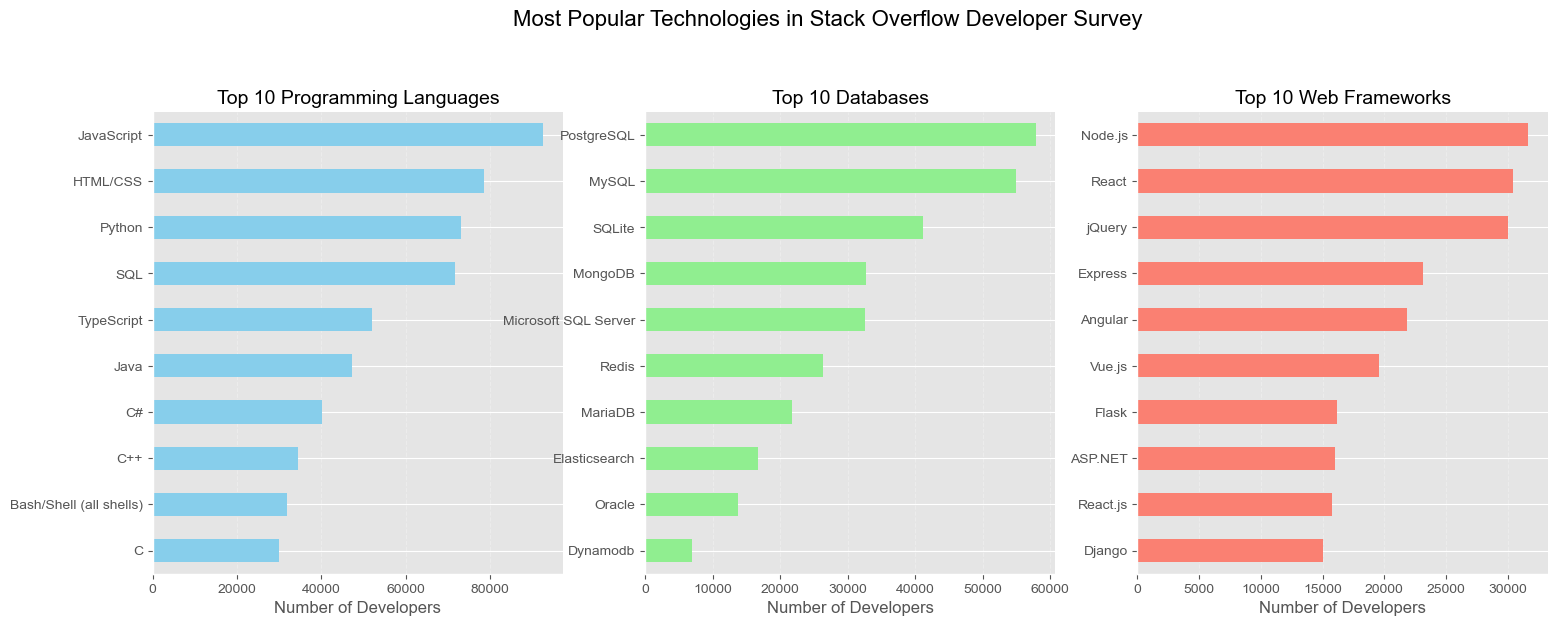

In [76]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# 3 plots



#plot one

all_langs = []
for langs in stack_df['LanguageHaveWorkedWith'].dropna():
    all_langs.extend(langs.split(';'))
    
lang_counts = pd.Series(all_langs).value_counts().head(10)


lang_counts.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Programming Languages', fontsize=14)
axes[0].set_xlabel('Number of Developers', fontsize=12)
axes[0].set_ylabel('')
axes[0].invert_yaxis()  


#plot two
all_dbs = []
for dbs in stack_df['DatabaseHaveWorkedWith'].dropna():
    all_dbs.extend(dbs.split(';'))

 
db_counts = pd.Series(all_dbs).value_counts().head(10)

db_counts.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Databases', fontsize=14)
axes[1].set_xlabel('Number of Developers', fontsize=12)
axes[1].set_ylabel('')
axes[1].invert_yaxis()  

#plot three
all_frames = []
for frames in stack_df['WebframeHaveWorkedWith'].dropna():
    all_frames.extend(frames.split(';'))
    
frame_counts = pd.Series(all_frames).value_counts().head(10)

frame_counts.plot(kind='barh', ax=axes[2], color='salmon')
axes[2].set_title('Top 10 Web Frameworks', fontsize=14)
axes[2].set_xlabel('Number of Developers', fontsize=12)
axes[2].set_ylabel('')
axes[2].invert_yaxis()  

fig.suptitle('Most Popular Technologies in Stack Overflow Developer Survey', fontsize=16, y=1.05)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', alpha=0.3)


plt.show()

# Ethics & Privacy

Concluding that UCSD does not adequately prepare students for the workforce could negatively impact the university's reputation and discourage prospective students. This may be a misinterpretation of the university's ability to prepare students, as it is a large research university, and many skills can be learned through on site research programs that teach technologies not outlined in the curriculum. 

PRIVACY: There are no significant privacy concerns in this research as the primary data—university curriculums, reported technologies, and publicly available surveys (e.g., Stack Overflow)—is already accessible to the public. 

BIASES: 

Funding Disparities : Universities with more funding may offer more thorough curriculums, teaching more languages, libraries, and frameworks than others. Thus, they have a higher correlation to tools used in jobs, skewing the analysis toward their favor. The same holds for UCs with higher prestige / reputations. 

However, UCSD is not the most nor least reputable UC. As a result, the more / less prestugous may even out to dappen the effect of funding. 

Bias in Survey Respondents: 
Our main source of data comes from the Stack Overflow 2024 Developer Survey, in which 65,000 respondents from 185 countries answered questions. Our question analyzes the curriculums of UCs, and it is safe to assume most UC CS graduates remain within the country. Therefore, respondents from the other 184 countries may use different technologies, some of which may not be taught in UC curriculums. 

Grouping UCs for Curriculum Averages: Taking averages of curriculums across UC campuses could mask differences in quality between individual programs, making the grouped UCs appear stronger. 

Inclusion of Non-CS Majors in Job Fields: 
The technologies that developers reported arent necessarily used by only computer science majors. Individuals from related majors (Data Science, Mathematics, Computer Engineering),  could have reported their skills, and thus wont align with what CS majors need to know on the job. As a solution, if possible, we should filter data to include only CS major - reported technologies.


# Team Expectations 


* We will discuss through our group discord to discuss anything related to the project.
* If we have issues or disagreements, we will communicate politely and through meaningful group discussions.
* We will divide up the work equally and all work on our part with care
* Jae Kim, Peter Shamoun, Emily Cai, Viki Shi

# Project Timeline Proposal




| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/05  |  3 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Make Discord Server to communicate; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 2/09  |  7 PM |  Look for potential topics | Discuss ideal datasets and ethics; submit project proposal | 
| 2/16  | 7 PM  | Look for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/21  | 2 PM  | Import & Wrangle Data | Review/Edit data; Complete Checkpoint #1- data   |
| 3/09  | 7 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete Checkpoint#2- EDA |
| 3/15  | 7 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/19  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |